# Explore sentiment and token classification results


## Sentiment Analysis


### Load data

In [ ]:
import os
import json
import pathlib

data_folder = "./../../data/processed/sentiment_analysis"
file_paths = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".json")]
file_paths.sort()

data = []
for file_path in file_paths:
    with open(file_path, "r") as f:
        data.append(json.load(f))

print(data[0].keys())
print(data[0]['songs'][0].keys())
print(data[0]['songs'][0]['sentiment'].keys())
print(data[0]['songs'][0]['sentiment']['de_gbert'].keys())


### Sentiment Plots


In [ ]:
def convert_labels(labels, model_name):
    # de_gbert: Possible labels: 0, 1
    # Could not find the difference between these two, ignoring...
    if model_name == 'de_bert':
        # Possible labels: positive = Positive, negative = Negative, neutral = Neutral
        labels = [label.replace('positive', 'Positive').replace('negative', 'Negative').replace('neutral', 'Neutral') for label in labels]
    elif model_name == 'en_distilbert':
        # Possible labels: POSITIVE = Positive, NEGATIVE = Negative
        labels = [label.replace('POSITIVE', 'Positive').replace('NEGATIVE', 'Negative') for label in labels]
    elif model_name == 'en_roberta':
        # Possible labels: LABEL_0 = Negative, LABEL_1 = Neutral, LABEL_2 = Positive
        labels = [label.replace('LABEL_0', 'Negative').replace('LABEL_1', 'Neutral').replace('LABEL_2', 'Positive') for label in labels]

    return labels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

overall_labels_count_de_bert = {
    'Positive': 0,
    'Negative': 0,
    'Neutral': 0
}
overall_labels_count_en_distilbert = {
    'Positive': 0,
    'Negative': 0
}
overall_labels_count_en_roberta = {
    'Positive': 0,
    'Negative': 0,
    'Neutral': 0
}

for artist in data:

    artist_name = artist['artist']
    artist_language = artist['songs'][0]['language']

    labels_de_gbert = []
    labels_de_bert = []
    labels_en_distilbert = []
    labels_en_roberta = []

    for song in artist['songs']:
        if song['language'] == 'de':
            de_gbert = song['sentiment']['de_gbert']['label']
            labels_de_gbert.append(de_gbert)
            de_bert = song['sentiment']['de_bert']['label']
            labels_de_bert.append(de_bert)
        else:
            en_distilbert = song['sentiment']['en_distilbert']['label']
            labels_en_distilbert.append(en_distilbert)
            en_roberta = song['sentiment']['en_roberta']['label']
            labels_en_roberta.append(en_roberta)

    # Convert labels
    labels_de_gbert = convert_labels(labels_de_gbert, 'de_gbert')
    labels_de_bert = convert_labels(labels_de_bert, 'de_bert')
    labels_en_distilbert = convert_labels(labels_en_distilbert, 'en_distilbert')
    labels_en_roberta = convert_labels(labels_en_roberta, 'en_roberta')

    # Count same labels
    labels_de_gbert = pd.Series(labels_de_gbert)
    labels_de_bert = pd.Series(labels_de_bert)
    labels_en_distilbert = pd.Series(labels_en_distilbert)
    labels_en_roberta = pd.Series(labels_en_roberta)

    labels_de_gbert_count = labels_de_gbert.value_counts()
    labels_de_bert_count = labels_de_bert.value_counts()
    labels_en_distilbert_count = labels_en_distilbert.value_counts()
    labels_en_roberta_count = labels_en_roberta.value_counts()

    if artist_language == 'de':
        # Add to overall count
        overall_labels_count_de_bert['Positive'] += labels_de_bert_count['Positive']
        overall_labels_count_de_bert['Negative'] += labels_de_bert_count['Negative']
        overall_labels_count_de_bert['Neutral'] += labels_de_bert_count['Neutral']

        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - de_bert")
        # Same color for all labels
        plt.bar(labels_de_bert_count.index, labels_de_bert_count.values, color=['#1f77b4'])
        # Add bar labels
        for i, v in enumerate(labels_de_bert_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/sentiment_{artist_name}_de_bert.png")
        plt.show()
    else:
        # Add to overall count
        overall_labels_count_en_distilbert['Positive'] += labels_en_distilbert_count['Positive']
        overall_labels_count_en_distilbert['Negative'] += labels_en_distilbert_count['Negative']
        overall_labels_count_en_roberta['Positive'] += labels_en_roberta_count['Positive']
        overall_labels_count_en_roberta['Negative'] += labels_en_roberta_count['Negative']
        overall_labels_count_en_roberta['Neutral'] += labels_en_roberta_count['Neutral']


        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - en_distilbert")
        # Same color for all labels
        plt.bar(labels_en_distilbert_count.index, labels_en_distilbert_count.values, color=['#1f77b4'])
        # Add bar labels
        for i, v in enumerate(labels_en_distilbert_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/sentiment_{artist_name}_en_distilbert.png")
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - en_roberta")
        # Same color for all labels
        plt.bar(labels_en_roberta_count.index, labels_en_roberta_count.values, color=['#1f77b4'])
        # Add bar labels
        for i, v in enumerate(labels_en_roberta_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/sentiment_{artist_name}_en_roberta.png")
        plt.show()

# Plot overall_labels_count_de_bert
plt.figure(figsize=(10, 5))
plt.title(f"Overall - de_bert")
plt.bar(overall_labels_count_de_bert.keys(), overall_labels_count_de_bert.values(), color=['#1f77b4'])
for i, v in enumerate(overall_labels_count_de_bert.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/sentiment_overall_de_bert.png")
plt.show()

# Plot overall_labels_count_en_distilbert
plt.figure(figsize=(10, 5))
plt.title(f"Overall - en_distilbert")
plt.bar(overall_labels_count_en_distilbert.keys(), overall_labels_count_en_distilbert.values(), color=['#1f77b4'])
for i, v in enumerate(overall_labels_count_en_distilbert.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/sentiment_overall_en_distilbert.png")
plt.show()

# Plot overall_labels_count_en_roberta
plt.figure(figsize=(10, 5))
plt.title(f"Overall - en_roberta")
plt.bar(overall_labels_count_en_roberta.keys(), overall_labels_count_en_roberta.values(), color=['#1f77b4'])
for i, v in enumerate(overall_labels_count_en_roberta.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/sentiment_overall_en_roberta.png")
plt.show()

## Token Classification Results


### Load Data


In [52]:
import os
import json

data_folder = "./../../data/processed/token_classification"
file_paths = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".json")]
file_paths.sort()

data = []
for file_path in file_paths:
    with open(file_path, "r") as f:
        data.append(json.load(f))

print(data[0].keys())
print(data[0]['songs'][0].keys())
print(data[0]['songs'][0]['token-classification'].keys())
print(data[0]['songs'][0]['token-classification']['de_roberta'][0].keys())


dict_keys(['artist', 'songs'])
dict_keys(['title', 'language', 'release_date', 'artist', 'album_name', 'lyrics', 'token-classification'])
dict_keys(['en_bertbase', 'de_roberta'])
dict_keys(['entity', 'word', 'start', 'end'])


### Plot Results


In [61]:
def convert_entity_types(entity_types):
    for i, entity_type in enumerate(entity_types):
        if entity_type == 'O':
            entity_types[i] = 'Outside'
        elif entity_type == 'B-MIS':
            entity_types[i] = 'Miscellaneous'
        elif entity_type == 'B-MISC':
            entity_types[i] = 'Miscellaneous'
        elif entity_type == 'I-MIS':
            entity_types[i] = 'Miscellaneous'
        elif entity_type == 'I-MISC':
            entity_types[i] = 'Miscellaneous'
        elif entity_type == 'B-PER':
            entity_types[i] = 'Person'
        elif entity_type == 'I-PER':
            entity_types[i] = 'Person'
        elif entity_type == 'B-ORG':
            entity_types[i] = 'Organization'
        elif entity_type == 'I-ORG':
            entity_types[i] = 'Organization'
        elif entity_type == 'B-LOC':
            entity_types[i] = 'Location'
        elif entity_type == 'I-LOC':
            entity_types[i] = 'Location'
        else:
            raise ValueError(f"Unknown entity_type: {entity_type}")
    return entity_types

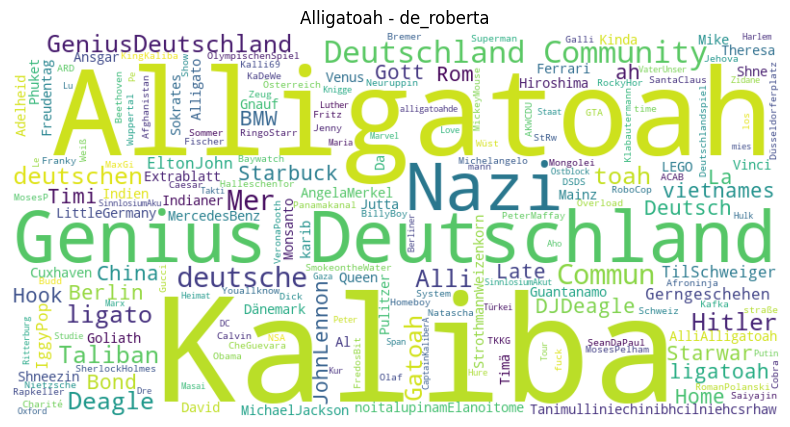

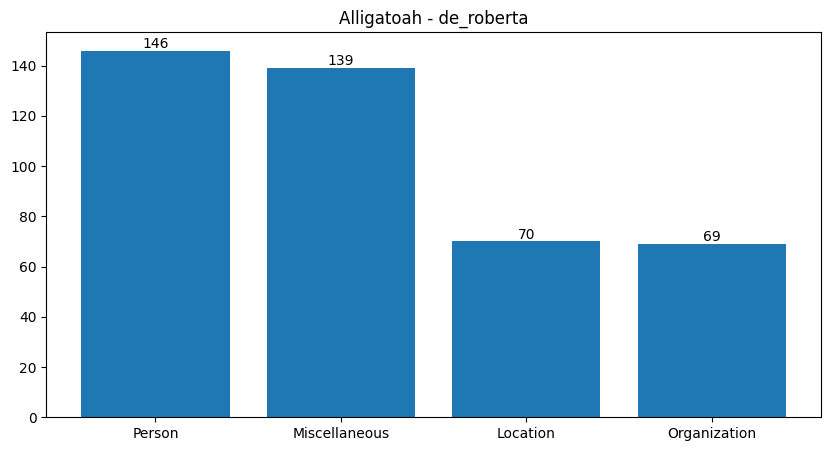

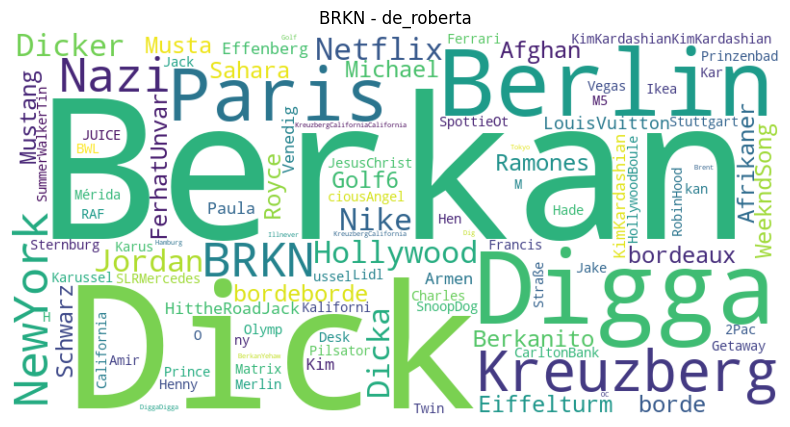

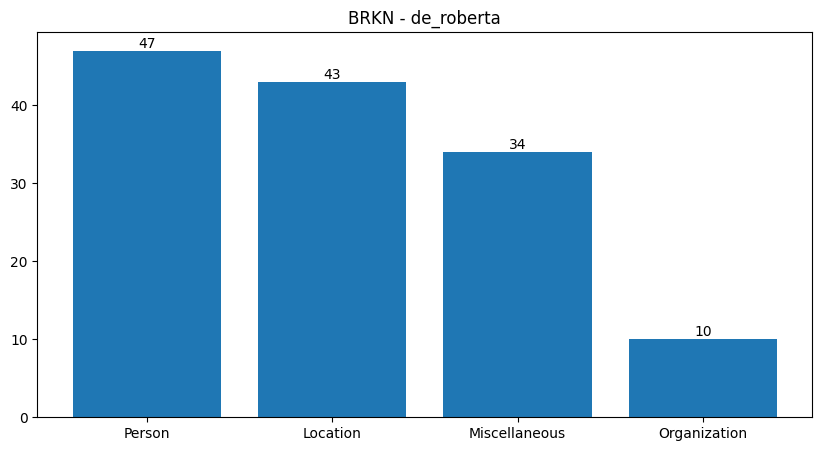

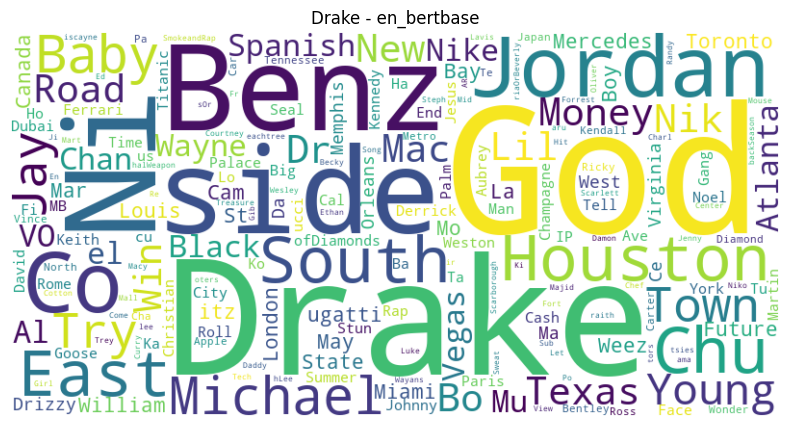

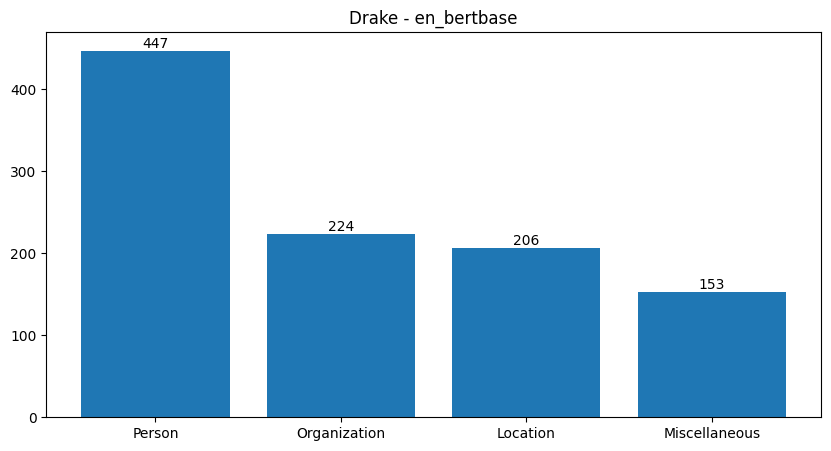

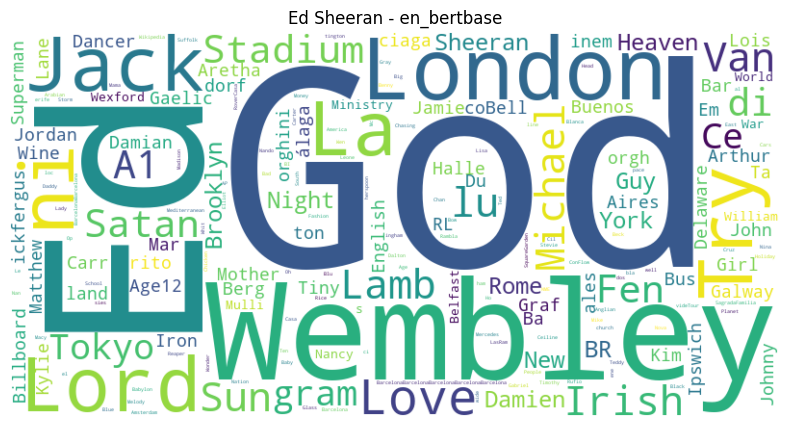

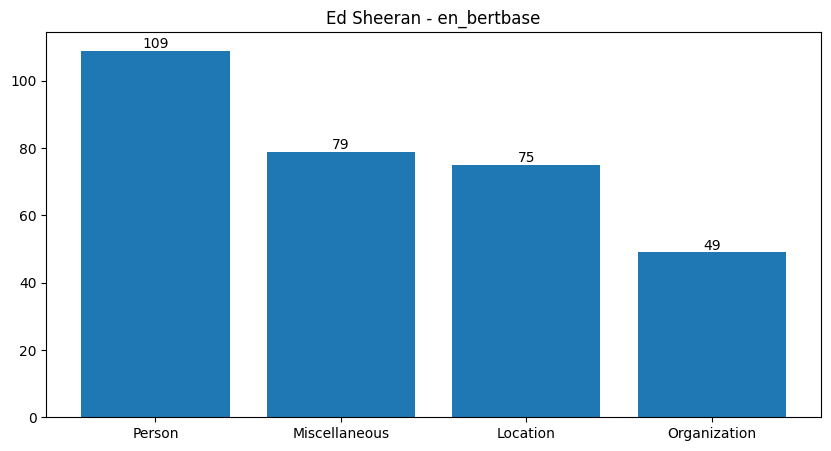

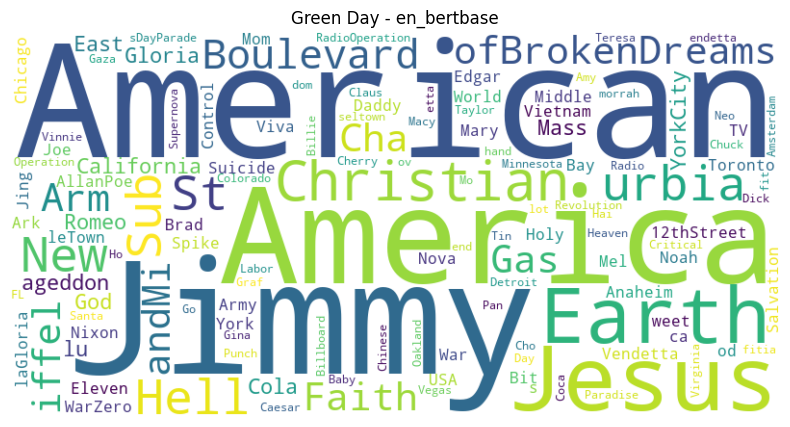

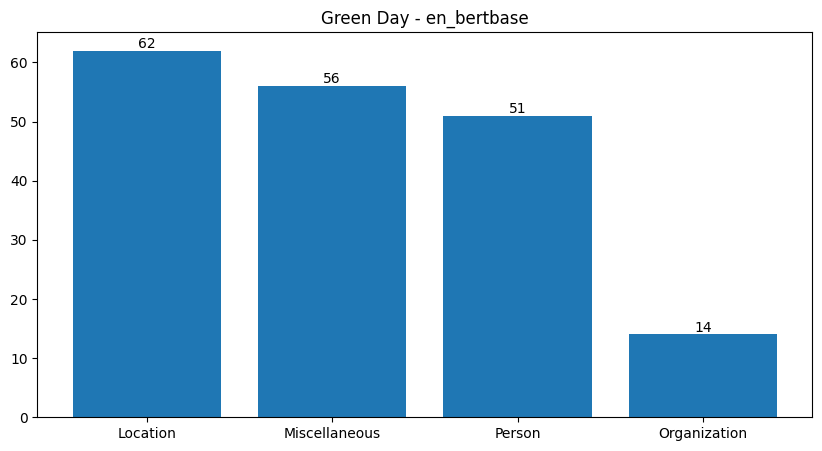

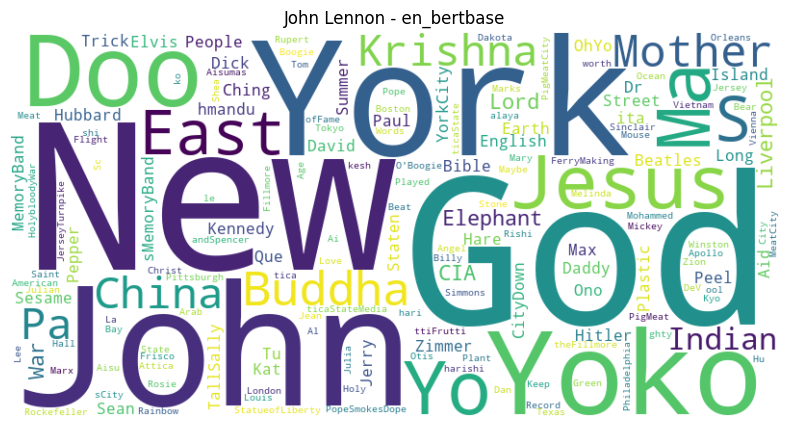

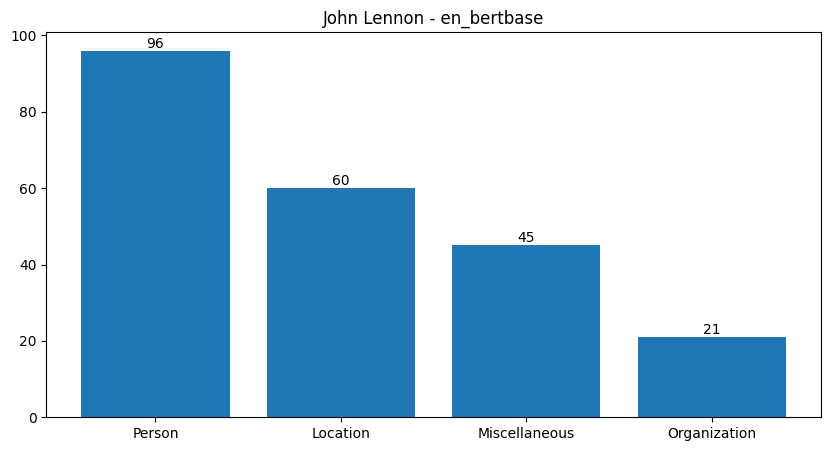

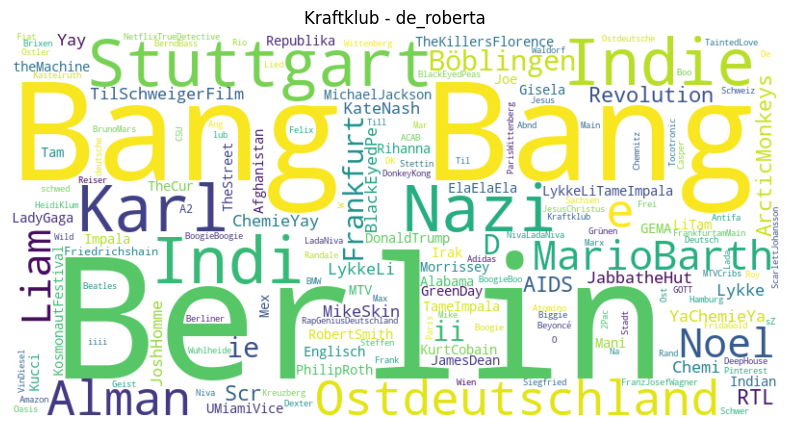

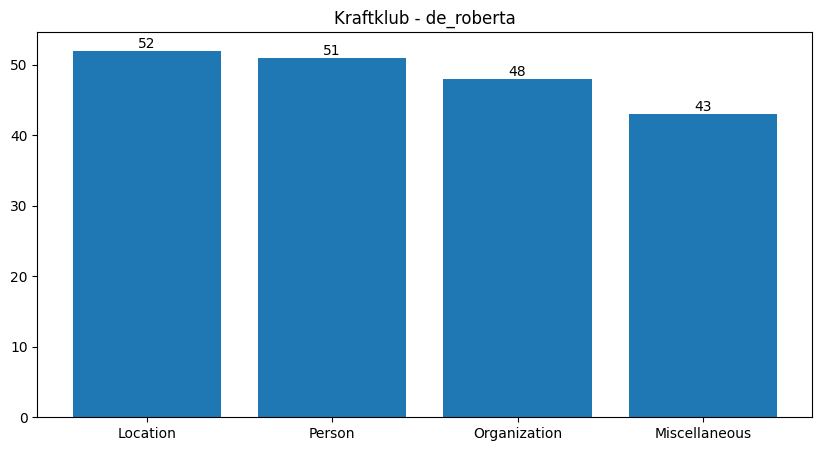

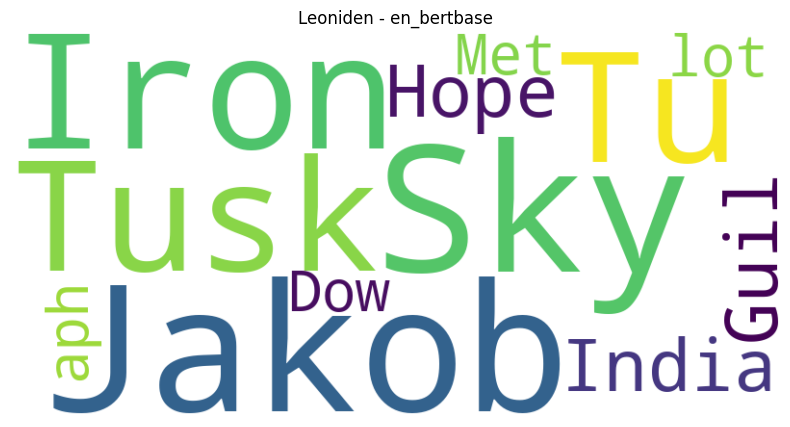

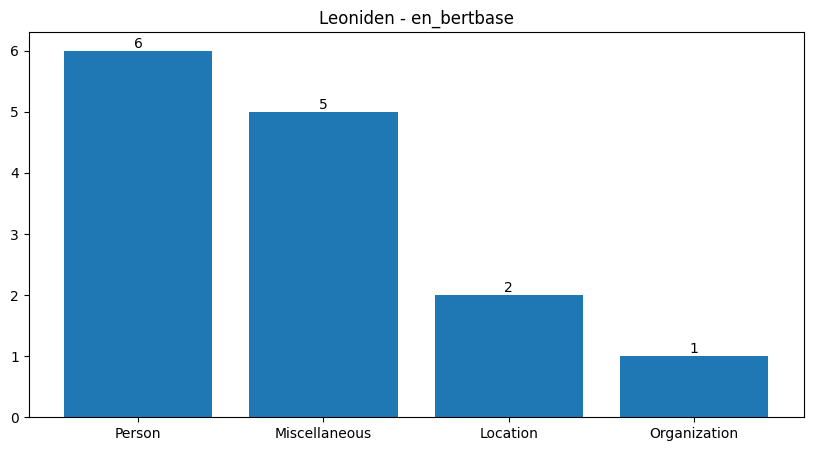

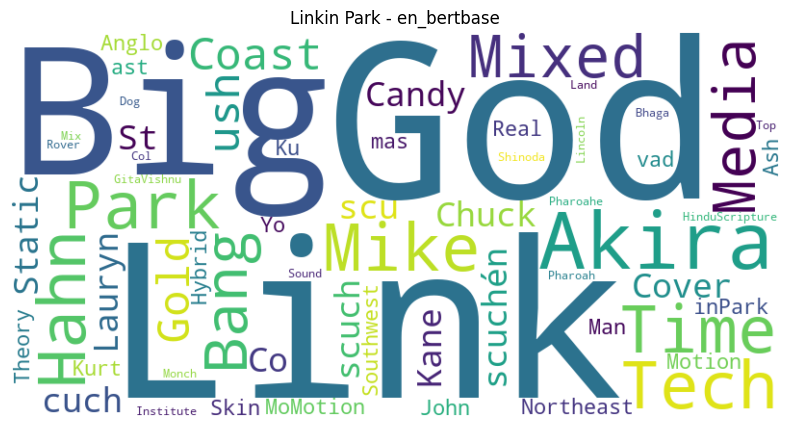

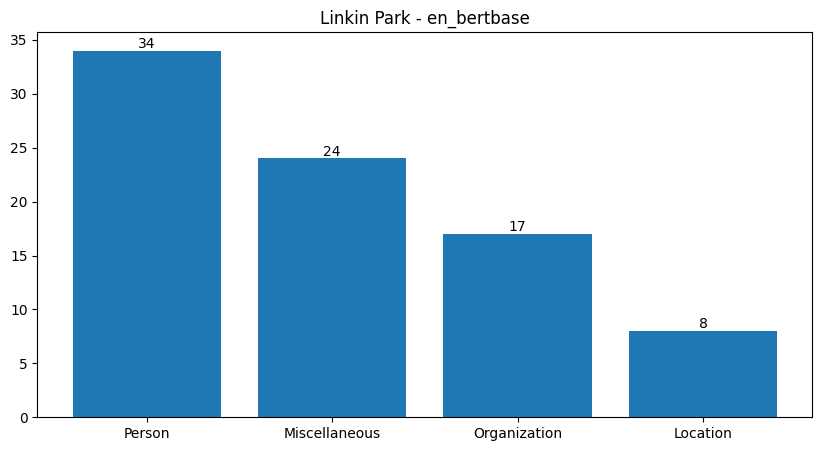

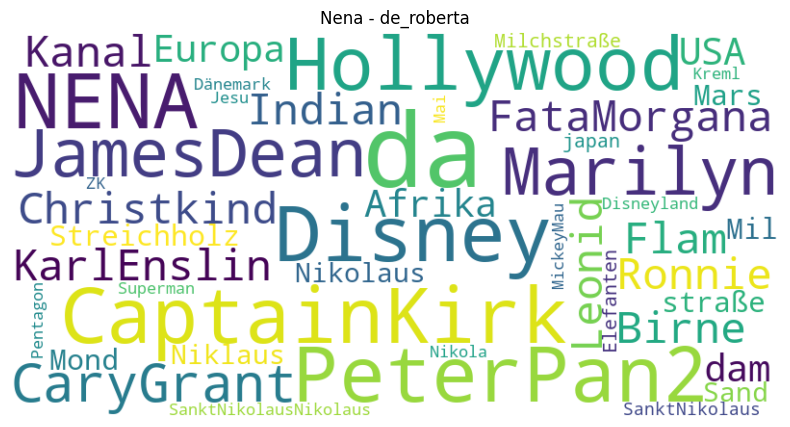

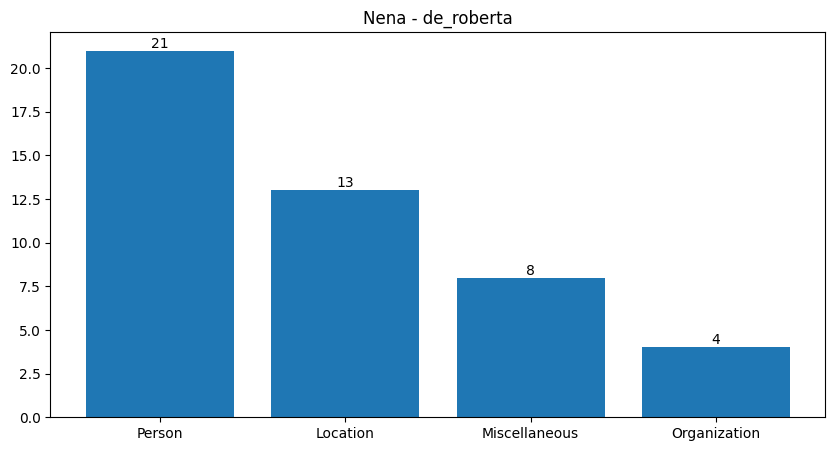

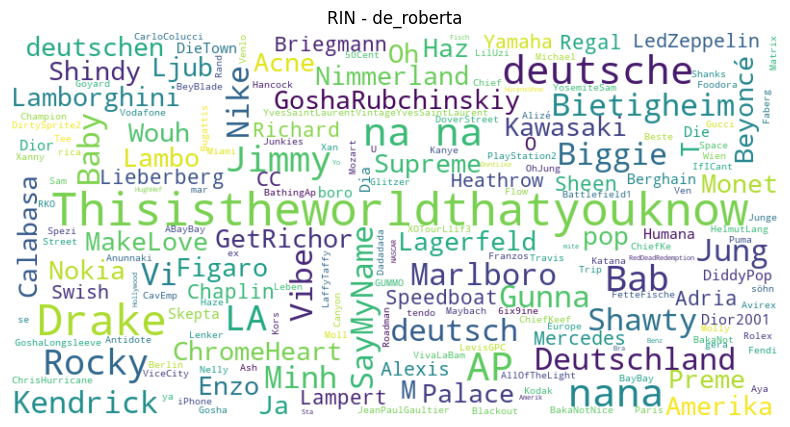

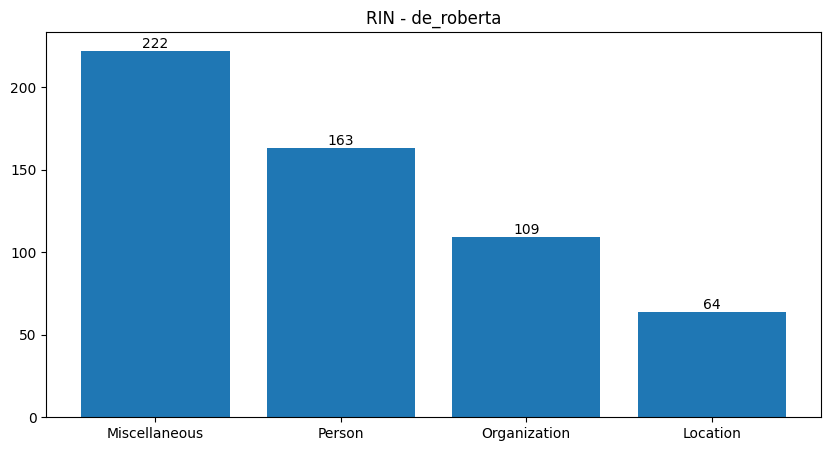

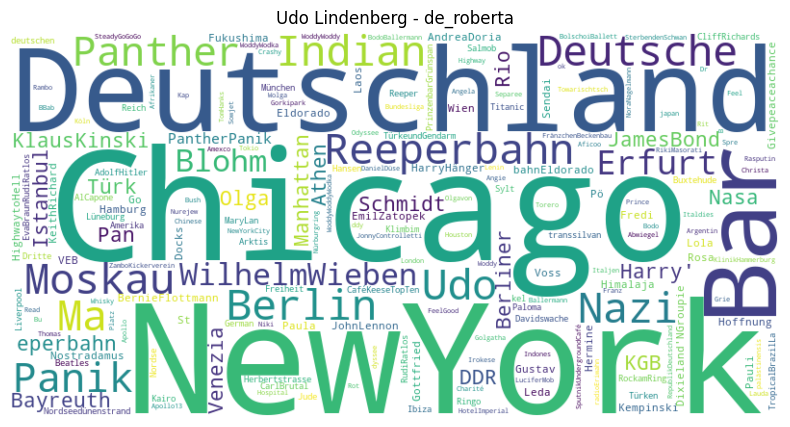

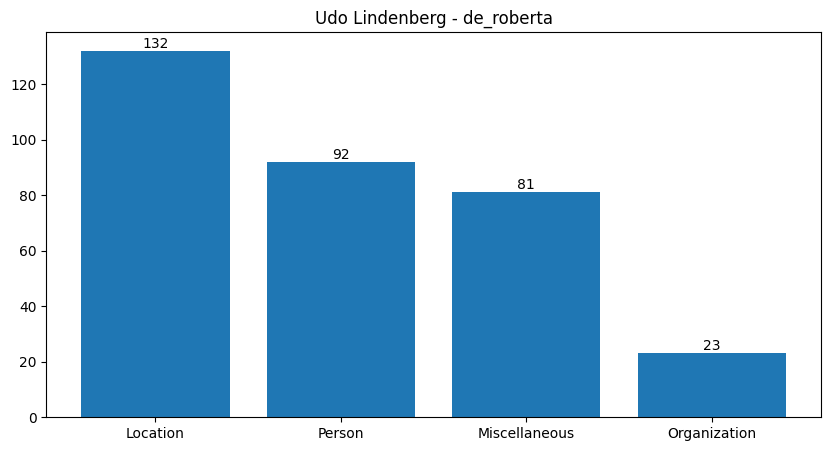

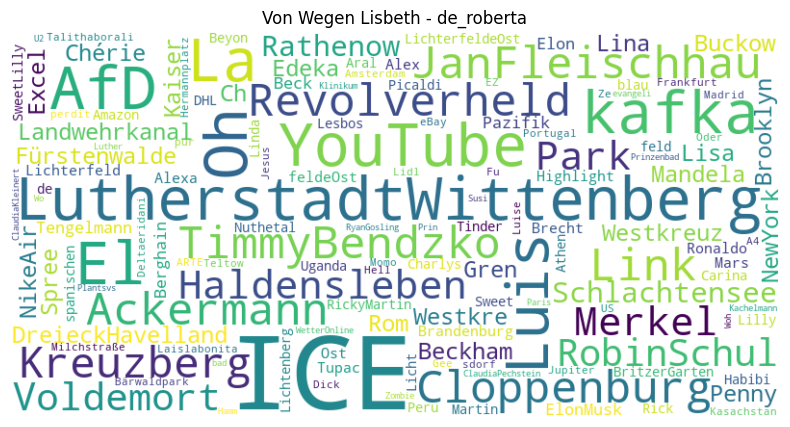

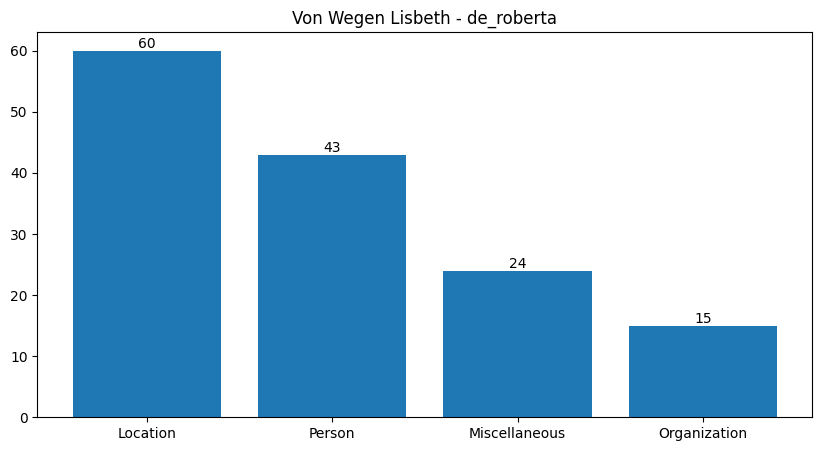

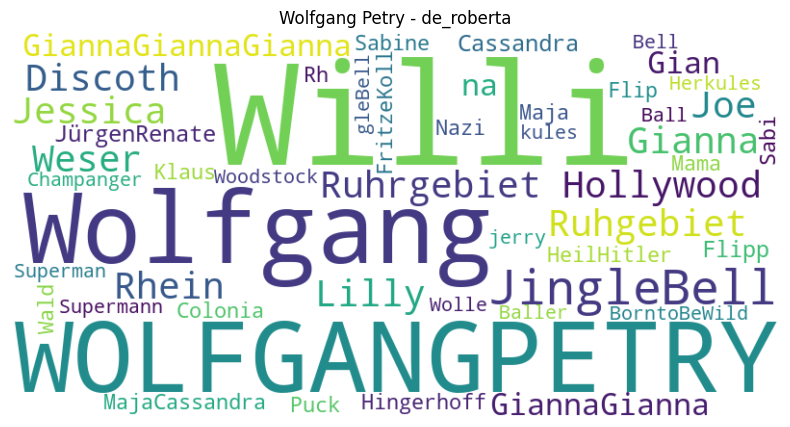

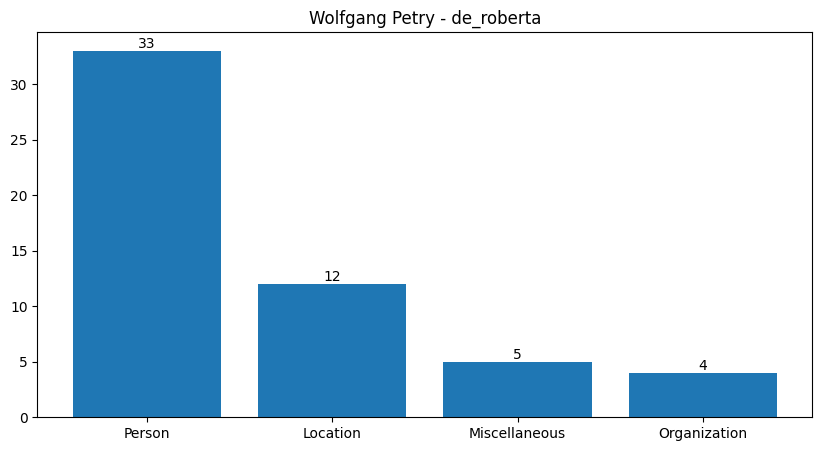

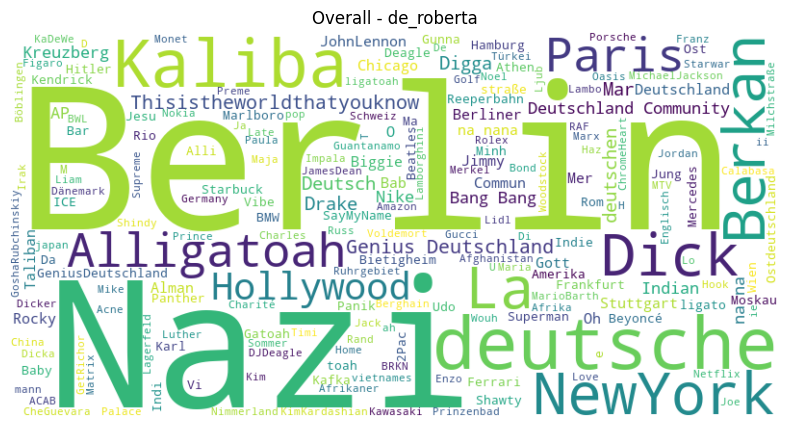

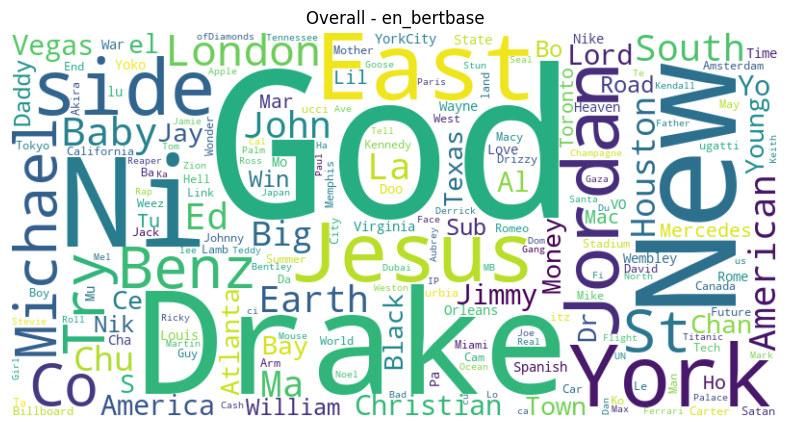

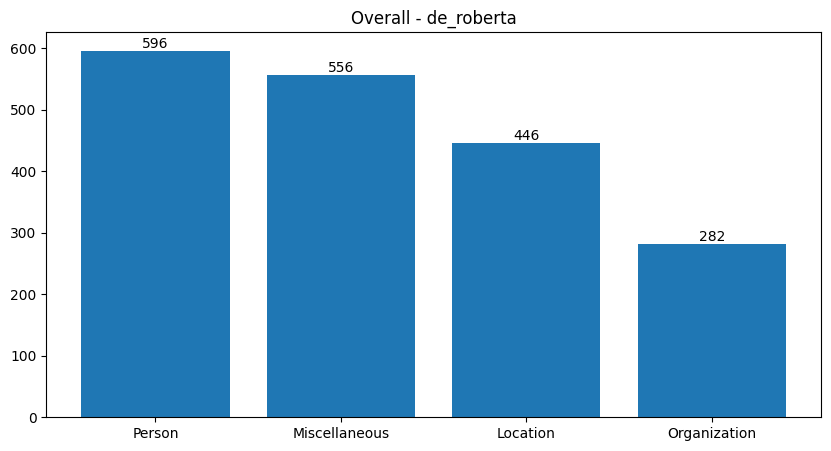

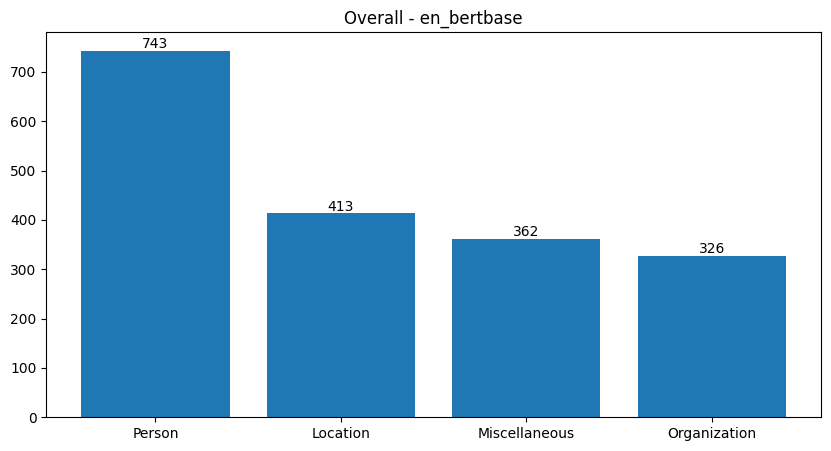

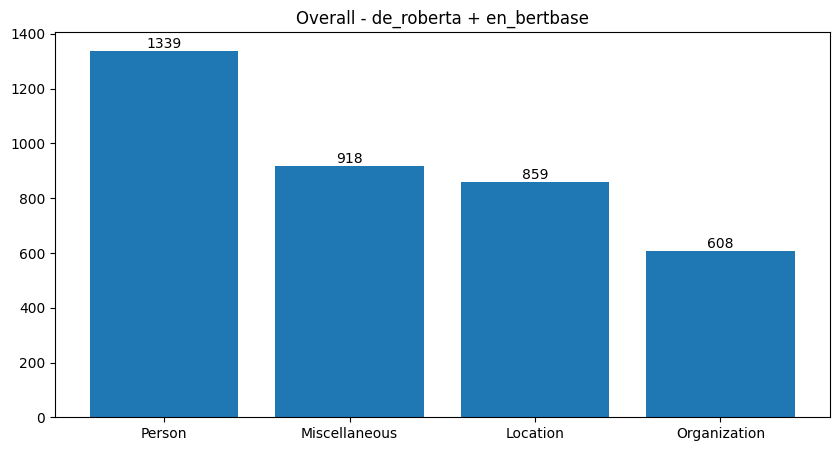

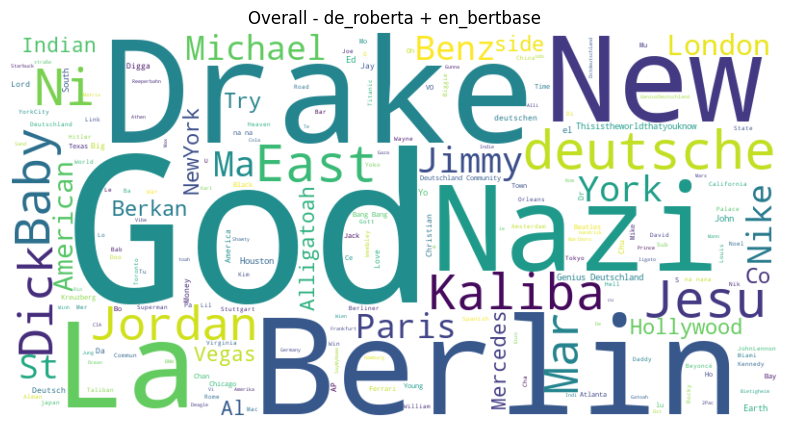

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud

overall_words_de_roberta = []
overall_words_en_bertbase = []
overall_entity_types_de_roberta = []
overall_entity_types_en_bertbase = []

for artist in data:
    artist_name = artist['artist']
    artist_language = artist['songs'][0]['language']

    de_roberta = []
    en_bertbase = []

    for song in artist['songs']:
        if artist_language == 'de':
            de_roberta.extend(song['token-classification']['de_roberta'])
        else:
            en_bertbase.extend(song['token-classification']['en_bertbase'])

    # Words only
    words_de_roberta = [entity['word'] for entity in de_roberta]
    words_en_bertbase = [entity['word'] for entity in en_bertbase]

    # To overall words
    overall_words_de_roberta.extend(words_de_roberta)
    overall_words_en_bertbase.extend(words_en_bertbase)

    # Entity types only
    entity_types_de_roberta = [entity['entity'] for entity in de_roberta]
    entity_types_en_bertbase = [entity['entity'] for entity in en_bertbase]

    # Convert entity types
    entity_types_de_roberta = convert_entity_types(entity_types_de_roberta)
    entity_types_en_bertbase = convert_entity_types(entity_types_en_bertbase)

    # To overall entity types
    overall_entity_types_de_roberta.extend(entity_types_de_roberta)
    overall_entity_types_en_bertbase.extend(entity_types_en_bertbase)

    # Word Cloud
    if artist_language == 'de':
        wordcloud_de_roberta = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(" ".join(words_de_roberta))

        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - de_roberta")
        plt.imshow(wordcloud_de_roberta, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(f"./../../data/output/token_classification_wordcloud_{artist_name}_de_roberta.png")
        plt.show()

    else:
        wordcloud_en_bertbase = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(" ".join(words_en_bertbase))
        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - en_bertbase")
        plt.imshow(wordcloud_en_bertbase, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(f"./../../data/output/token_classification_wordcloud_{artist_name}_en_bertbase.png")
        plt.show()

    # Entity Type Distribution
    if artist_language == 'de':
        entity_types_de_roberta_count = pd.Series(entity_types_de_roberta).value_counts()
        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - de_roberta")
        plt.bar(entity_types_de_roberta_count.index, entity_types_de_roberta_count.values, color=['#1f77b4'])
        for i, v in enumerate(entity_types_de_roberta_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/token_classification_entities_{artist_name}_de_roberta.png")
        plt.show()
    else:
        entity_types_en_bertbase_count = pd.Series(entity_types_en_bertbase).value_counts()
        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - en_bertbase")
        plt.bar(entity_types_en_bertbase_count.index, entity_types_en_bertbase_count.values, color=['#1f77b4'])
        for i, v in enumerate(entity_types_en_bertbase_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/token_classification_entities_{artist_name}_en_bertbase.png")
        plt.show()

# Plot overall word cloud
wordcloud_overall_de_roberta = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(" ".join(overall_words_de_roberta))
plt.figure(figsize=(10, 5))
plt.title(f"Overall - de_roberta")
plt.imshow(wordcloud_overall_de_roberta, interpolation='bilinear')
plt.axis("off")
plt.savefig(f"./../../data/output/token_classification_wordcloud_overall_de_roberta.png")
plt.show()

wordcloud_overall_en_bertbase = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(" ".join(overall_words_en_bertbase))
plt.figure(figsize=(10, 5))
plt.title(f"Overall - en_bertbase")
plt.imshow(wordcloud_overall_en_bertbase, interpolation='bilinear')
plt.axis("off")
plt.savefig(f"./../../data/output/token_classification_wordcloud_overall_en_bertbase.png")
plt.show()

# Plot overall entity type distribution
entity_types_overall_de_roberta_count = pd.Series(overall_entity_types_de_roberta).value_counts()
plt.figure(figsize=(10, 5))
plt.title(f"Overall - de_roberta")
plt.bar(entity_types_overall_de_roberta_count.index, entity_types_overall_de_roberta_count.values, color=['#1f77b4'])
for i, v in enumerate(entity_types_overall_de_roberta_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/token_classification_entities_overall_de_roberta.png")
plt.show()

entity_types_overall_en_bertbase_count = pd.Series(overall_entity_types_en_bertbase).value_counts()
plt.figure(figsize=(10, 5))
plt.title(f"Overall - en_bertbase")
plt.bar(entity_types_overall_en_bertbase_count.index, entity_types_overall_en_bertbase_count.values, color=['#1f77b4'])
for i, v in enumerate(entity_types_overall_en_bertbase_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/token_classification_entities_overall_en_bertbase.png")
plt.show()

# Combine roberta and bertbase
all_entity_types = overall_entity_types_de_roberta + overall_entity_types_en_bertbase
all_entity_types_count = pd.Series(all_entity_types).value_counts()
plt.figure(figsize=(10, 5))
plt.title(f"Overall - de_roberta + en_bertbase")
plt.bar(all_entity_types_count.index, all_entity_types_count.values, color=['#1f77b4'])
for i, v in enumerate(all_entity_types_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/token_classification_entities_overall_de_roberta_en_bertbase.png")
plt.show()

# Wordcloud roberta + bertbase
all_words = overall_words_de_roberta + overall_words_en_bertbase
wordcloud_all = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.title(f"Overall - de_roberta + en_bertbase")
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.savefig(f"./../../data/output/token_classification_wordcloud_overall_de_roberta_en_bertbase.png")
plt.show()
